# Ukraine War Losses of Russian Army

In this notebook I have analized Russian losses in this war. I am against this war and I condem everything Russians do. I was also affected by it and I saw the shelling of Kharkiv with my own eyes. Support Ukraine army and Ukraine volunteers, together we are stronger. SLAVA UKRAINI (glory to Ukraine). 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pio.templates.default = 'plotly_dark'
color_theme = px.colors.qualitative.Antique
pd.options.mode.chained_assignment = None 

In [15]:
personel_df = pd.read_csv('russia_losses_personnel.csv')
equipment_df = pd.read_csv('russia_losses_equipment.csv')

In [16]:
equipment_df.head()

date  day  aircraft  helicopter  tank  APC  field artillery  MRL  \
0  2022-02-25    2        10           7    80  516               49    4   
1  2022-02-26    3        27          26   146  706               49    4   
2  2022-02-27    4        27          26   150  706               50    4   
3  2022-02-28    5        29          29   150  816               74   21   
4  2022-03-01    6        29          29   198  846               77   24   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0          100.0       60.0      0           2                      0   
1          130.0       60.0      2           2                      0   
2          130.0       60.0      2           2                      0   
3          291.0       60.0      3           2                      5   
4          305.0       60.0      3           2                      7   

   special equipment  mobile SRBM system greatest losses direction  \
0                NaN                 NaN                       NaN   
1                NaN                 NaN                       NaN   
2                NaN                 NaN                       NaN   
3                NaN                 NaN                       NaN   
4                NaN                 NaN                       NaN   

   vehicles and fuel tanks  cruise missiles  
0                      NaN              NaN  
1                      NaN              NaN  
2                      NaN              NaN  
3                      NaN              NaN  
4                      NaN              NaN

In [17]:
equipment_df.loc[:64, 'vehicles and fuel tanks'] = equipment_df.loc[:64, 'fuel tank'] + equipment_df.loc[:64, 'military auto']
equipment_df.loc[:64, 'cruise missiles'] = equipment_df.loc[:64, 'mobile SRBM system']
equipment_df.drop(columns=['mobile SRBM system', 'military auto', 'fuel tank'], inplace=True)
equipment_df.tail()

date  day  aircraft  helicopter  tank   APC  field artillery  MRL  \
266  2022-11-18  268       278         261  2879  5808             1865  393   
267  2022-11-19  269       278         261  2885  5815             1867  393   
268  2022-11-20  270       278         261  2886  5817             1868  393   
269  2022-11-21  271       278         261  2892  5822             1870  393   
270  2022-11-22  272       278         261  2827  5822             1882  395   

     drone  naval ship  anti-aircraft warfare  special equipment  \
266   1536          16                    209              161.0   
267   1536          16                    209              161.0   
268   1537          16                    209              161.0   
269   1537          16                    209              161.0   
270   1537          16                    209              161.0   

    greatest losses direction  vehicles and fuel tanks  cruise missiles  
266        Lyman and Avdiivka                   4366.0            480.0  
267                       NaN                   4368.0            480.0  
268                       NaN                   4371.0            480.0  
269                       NaN                   4378.0            480.0  
270         Bakhmut and Lyman                   4393.0            480.0

In [18]:
def style():
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(font_color = '#9EDEC6')
    fig.show()

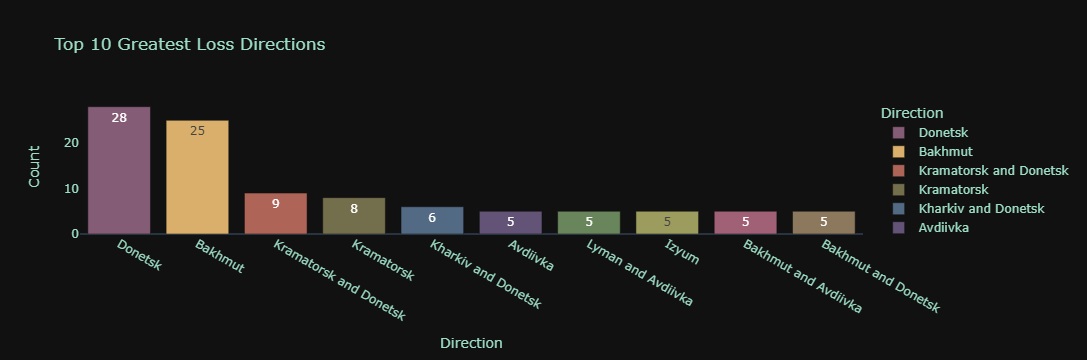

In [19]:
greatest_losses_direction = equipment_df['greatest losses direction'].value_counts().reset_index().rename(columns={'index': 'Direction', 'greatest losses direction': 'Count'})
fig = px.bar(greatest_losses_direction[:10], x='Direction', y='Count', color='Direction', text='Count', title='Top 10 Greatest Loss Directions', color_discrete_sequence=color_theme)
style()

In this graph, you can get to know some of the most terrifying and brutal directions of war. As seen, Donetsk, Bakhmut, Kramatorsk, Kharkiv, Avdiivka, Izyum and Sloviansk are directions in which Russian army loses most of its army equipment and troops

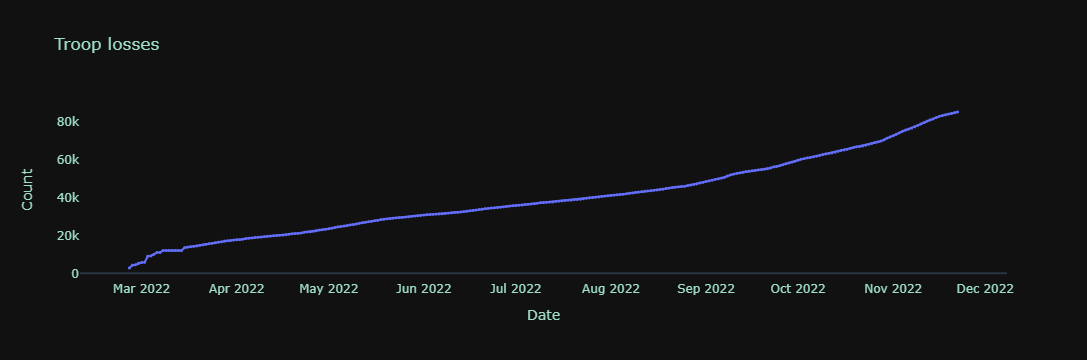

In [20]:
fig = px.line(personel_df, x='date', y='personnel', title='Troop losses', markers=True)
fig.update_traces(marker=dict(size=3))
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Count")
style()

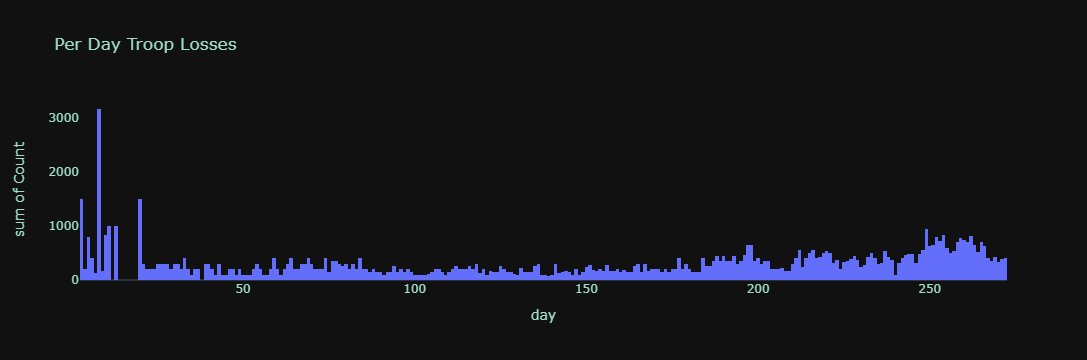

In [21]:
personel_df['Count'] = personel_df['personnel'] - personel_df['personnel'].shift(1)
fig = px.histogram(personel_df, x='day', y='Count', title='Per Day Troop Losses', nbins=max(personel_df['day']))
style()

Graphs above show how much troops died in Ukraine. Also, you can see how much troops died in a specific day. Please note, that first ~30 days were not measured precisely. People just had other stuff to take care of :/

In [22]:
#moving 'great losses direction' column to the start of dataframe
columns = list(equipment_df.columns)
columns.remove('greatest losses direction')
columns = ['greatest losses direction'] + columns
equipment_df = equipment_df[columns]

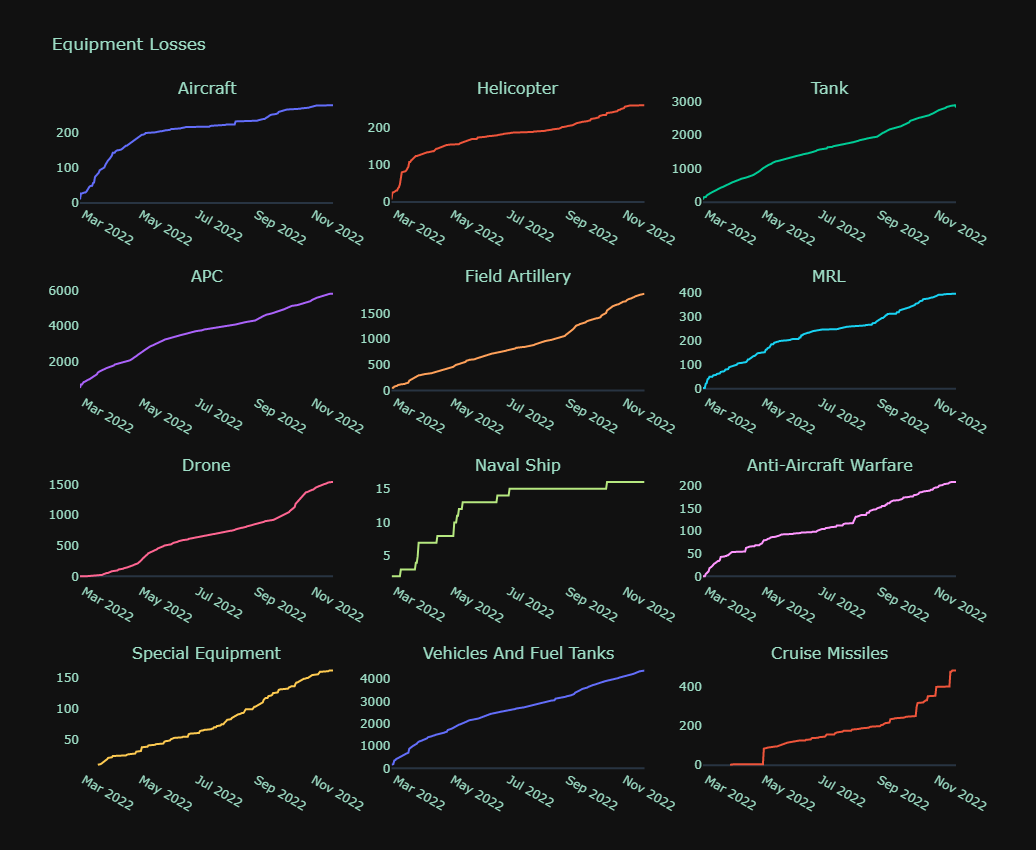

In [23]:
fig=go.Figure()
titles = []
for i in list(equipment_df.columns[3:]):
    title = i
    if i[0].isupper() == False:
        title = i.title()
    titles += [title]
fig=make_subplots(rows=4, cols=3, subplot_titles=titles)
for i in range(4):
    for j in range(3):
        fig.add_trace(go.Scatter(x=equipment_df['date'], name=titles[j+i*3], y=equipment_df.iloc[:, 3+(j+i*3)]), row=i+1, col=j+1)
        
fig.update_layout(title='Equipment Losses', showlegend=False, height = 850, width = 750)
style()

In that graph its shown how much equipment have Russia lost. It would be very interesting to calculate the total cost, but unfortunately, I do not have data to do so. Maybe in the future. Just think for a second how much money is wasted. It could have served for the people of Russia by building new hospitals, schools, universities, roads, etc.

In [24]:
#animation_df created for animation of equipment losses
max_day = equipment_df['day'].max()
min_day = equipment_df['day'].min()
temp_arr = []
for i in list(equipment_df.columns[3:]):
        temp_arr += [i]*(max_day+1-min_day)

temp_dictionary = {'Equipment': temp_arr}
temp_arr=[]
for j in range(len(list(equipment_df.columns[3:]))):
    for i in range(min_day, max_day+1):
        temp_arr += [i]

temp_dictionary['Day'] = temp_arr
temp_arr = []
for j in list(equipment_df.columns[3:]):
    for i in equipment_df[j]:
        temp_arr+=[i]

temp_dictionary['Count'] = temp_arr


animation_df = pd.DataFrame(temp_dictionary)

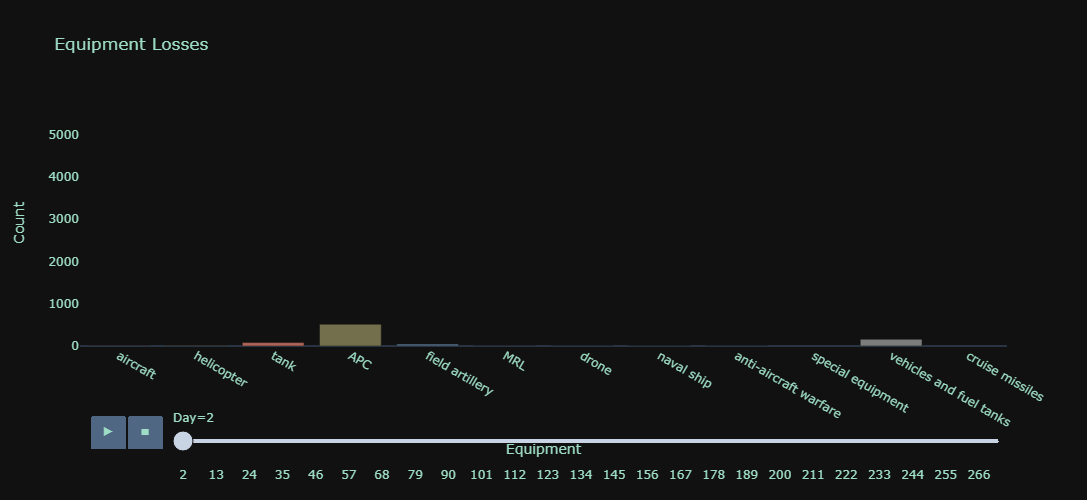

In [25]:
fig = px.bar(animation_df, x='Equipment', title='Equipment Losses', y='Count', color='Equipment', animation_frame='Day', range_y=[0, max(animation_df['Count'])], color_discrete_sequence=color_theme)
fig.update_layout(showlegend=False, height = 500, width = 700)
style()

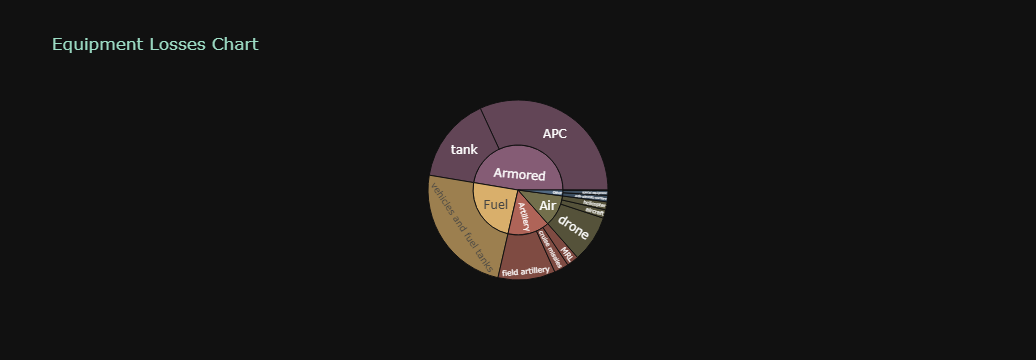

In [26]:
sunburst_df = animation_df.loc[animation_df['Day'] == max_day]
sunburst_df['Equipment Type'] = sunburst_df['Equipment'].map({'aircraft': 'Air', 'helicopter': 'Air', 'drone': 'Air', 'vehicles and fuel tanks': 'Fuel', 'tank': 'Armored', 'APC': 'Armored', 'field artillery': 'Artillery', 'MRL': 'Artillery', 'naval ship': 'Other', 'anti-aircraft warfare': 'Other', 'special equipment': 'Other', 'cruise missiles': 'Artillery'})
fig = px.sunburst(sunburst_df, title = 'Equipment Losses Chart',path=['Equipment Type', 'Equipment'], values='Count', color_discrete_sequence=color_theme)
style()

Conclusion. Thank you all for sticking to the notebook. Todays war is a real tragedy in Europe and I hope it ends soon. In that notebook you have seen overall Russian army losses. Please note, that in wartime it might be hard to calculate exact numbers, so those numbers were taken approximately. As seen, Russia have lost more than 65 thousand troops in Ukraine. It have also lost huge numbers of its equipment, such as APCs, vehicles and fuel tanks, tanks, field artilery, drones etc. Hope you enjoyed the notebook. Support Ukraine and have a nice day :)